In [118]:
#learndataa learndataa learndataa learndataa learndataa learndataa learndataa learndataa learndataa

# Mushroom Classifier

#### Dataset Source

UCI Machine Learning Repository

    - License: ---
    - Donor: UCI, Jeff Schlimmer (Jeffrey.Schlimmer '@' a.gp.cs.cmu.edu)
    - Source Link: https://archive.ics.uci.edu/ml/datasets/mushroom
    - Download: https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/
    - Data last updated: ---
    - Origin: Mushroom records drawn from The Audubon Society Field Guide to North American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred A. Knopf
    - Citation: Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

### Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [22]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### Download data

In [6]:
# Set path to data folder
path = '/Users/erv/Desktop/mushroom/'

### Data

Class (y): 
   - edible: 4208 (51.8%) --> 'e'
   - poisonous: 3916 (48.2%) --> 'p'

In [7]:
# Manually create dictionary
attr = {
    'cap-shape':                ['bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s'],
    'cap-surface':              ['fibrous=f,grooves=g,scaly=y,smooth=s'],
    'cap-color':                ['brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y'],
    'bruises':                  ['bruises=t,no=f'],
    'odor':                     ['almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s'],
    'gill-attachment':          ['attached=a,descending=d,free=f,notched=n'],
    'gill-spacing':             ['close=c,crowded=w,distant=d'],
    'gill-size':                ['broad=b,narrow=n'],
    'gill-color':               ['black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y'],
    'stalk-shape':              ['enlarging=e,tapering=t'],
    'stalk-root':               ['bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?'],
    'stalk-surface-above-ring': ['fibrous=f,scaly=y,silky=k,smooth=s'],
    'stalk-surface-below-ring': ['fibrous=f,scaly=y,silky=k,smooth=s'],
    'stalk-color-above-ring':   ['brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y'],
    'stalk-color-below-ring':   ['brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y'],
    'veil-type':                ['partial=p,universal=u'],
    'veil-color':               ['brown=n,orange=o,white=w,yellow=y'],
    'ring-number':              ['none=n,one=o,two=t'],
    'ring-type':                ['cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z'],
    'spore-print-color':        ['black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y'],
    'population':               ['abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y'],
    'habitat':                  ['grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d'],
}

print("Number of feaures:", len(attr))

# Update dictionary
for key, value in attr.items():
    attr[key]= value[0].split(',')

Number of feaures: 22


In [8]:
# Read mushroom data for features
dfmain = pd.read_csv(path + 'agaricus-lepiota.data', header=None)
print(dfmain.shape)
dfmain.head(2)

(8124, 23)


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g


In [12]:
# Add column names
dfmain.columns = ['class'] + list(attr.keys())
dfmain.head(2)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g


#### Check for missing values

In [13]:
dfmain.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#### Split training features and output class

In [15]:
Xmain = dfmain[dfmain.columns[~dfmain.columns.isin(['class'])]]
y = dfmain['class']

In [16]:
Xmain.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

#### Check proportion of each class

In [17]:
dfmain.groupby(['class'])['class'].count()

class
e    4208
p    3916
Name: class, dtype: int64

### Preprocessing

#### Create dummy variables

In [18]:
Xmain = pd.get_dummies(Xmain)
Xmain.columns

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)

In [19]:
Xmain.head(2)

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


#### Check for collinearity

In [20]:
x_corr = Xmain.corr()**2

All feature labels may not be visible on the plot


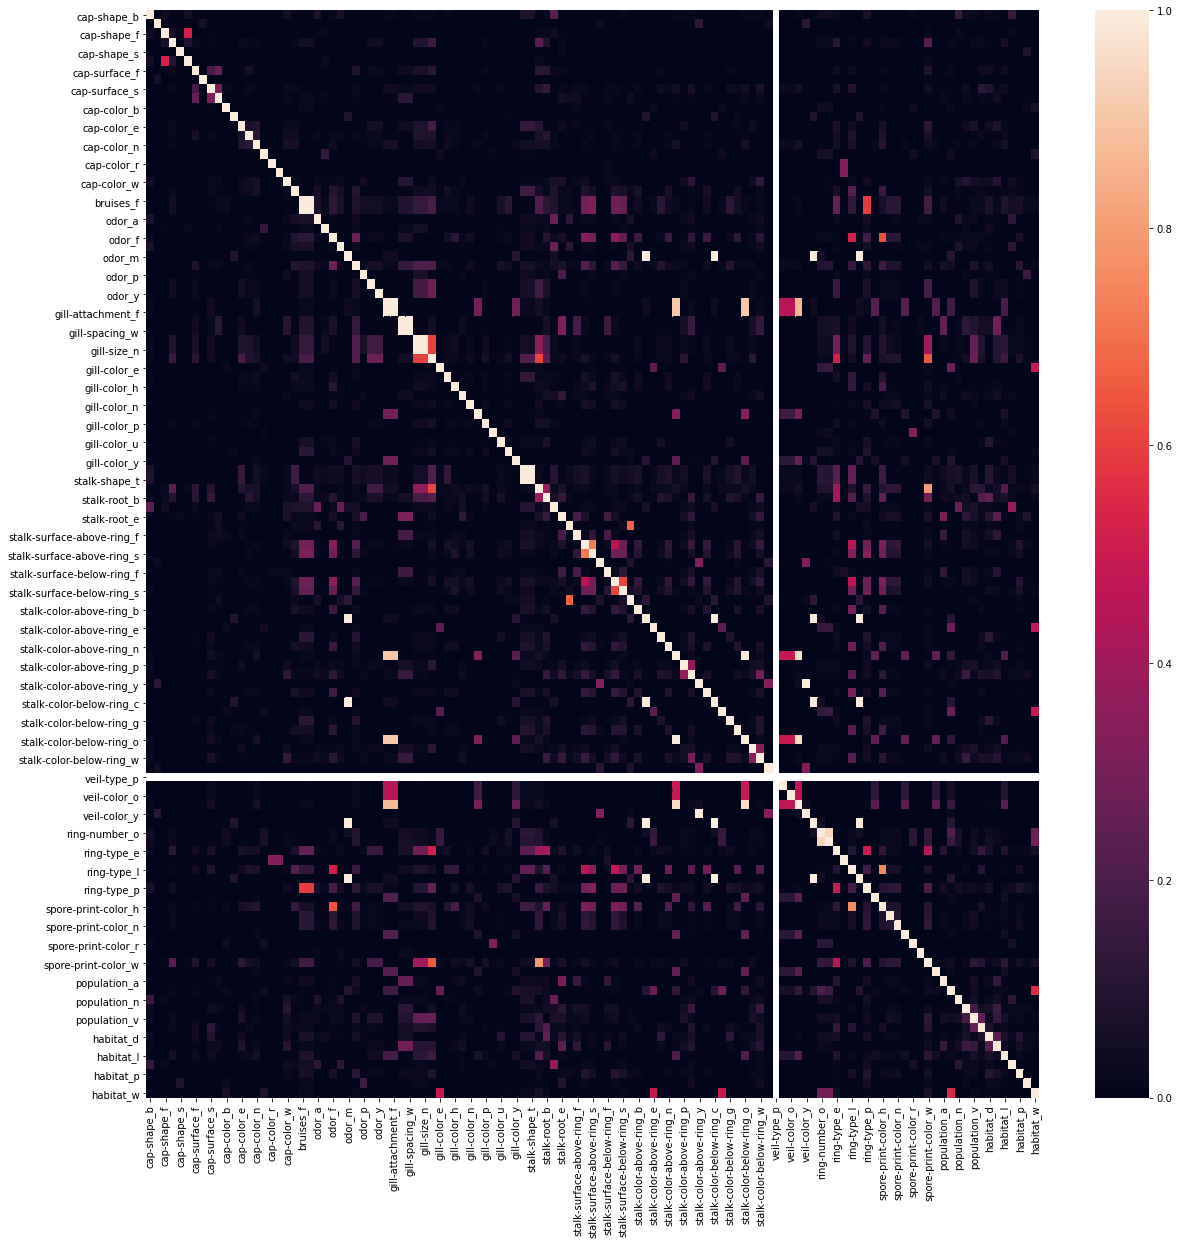

In [25]:
print("All feature labels may not be visible on the plot")
fig = plt.figure(figsize=(20,20))
sns.heatmap(x_corr.round(2)) #, annot=True)
plt.show()

In [30]:
# Remove correlated columns or features

def remove_colinear_cols(X):
    cols = list(X.columns)
    print("Numer of features (before):", len(cols))
    
    for col in cols:
        for icol in cols:
            if(col!=icol):
                rsq = np.corrcoef(X[col], X[icol])[0,1]**2
                if((rsq >=0.7) | (rsq <= -0.7)):
                    cols.remove(icol)
    print('Number of features (after):', len(cols))
    return cols

# Update keep only non-colinear features
new_cols = remove_colinear_cols(Xmain)

Numer of features (before): 117


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


Number of features (after): 100


In [60]:
# With colinearity
#X = Xmain.copy()

# Removed colinearity
X = Xmain[new_cols]
X.shape

(8124, 100)

#### Remove columns with zero variability

In [61]:
X = X[X.columns[~X.columns.isin(['veil-type_p'])]]
X.shape

(8124, 99)

#### Plot 

All feature labels may not be visible on the plot


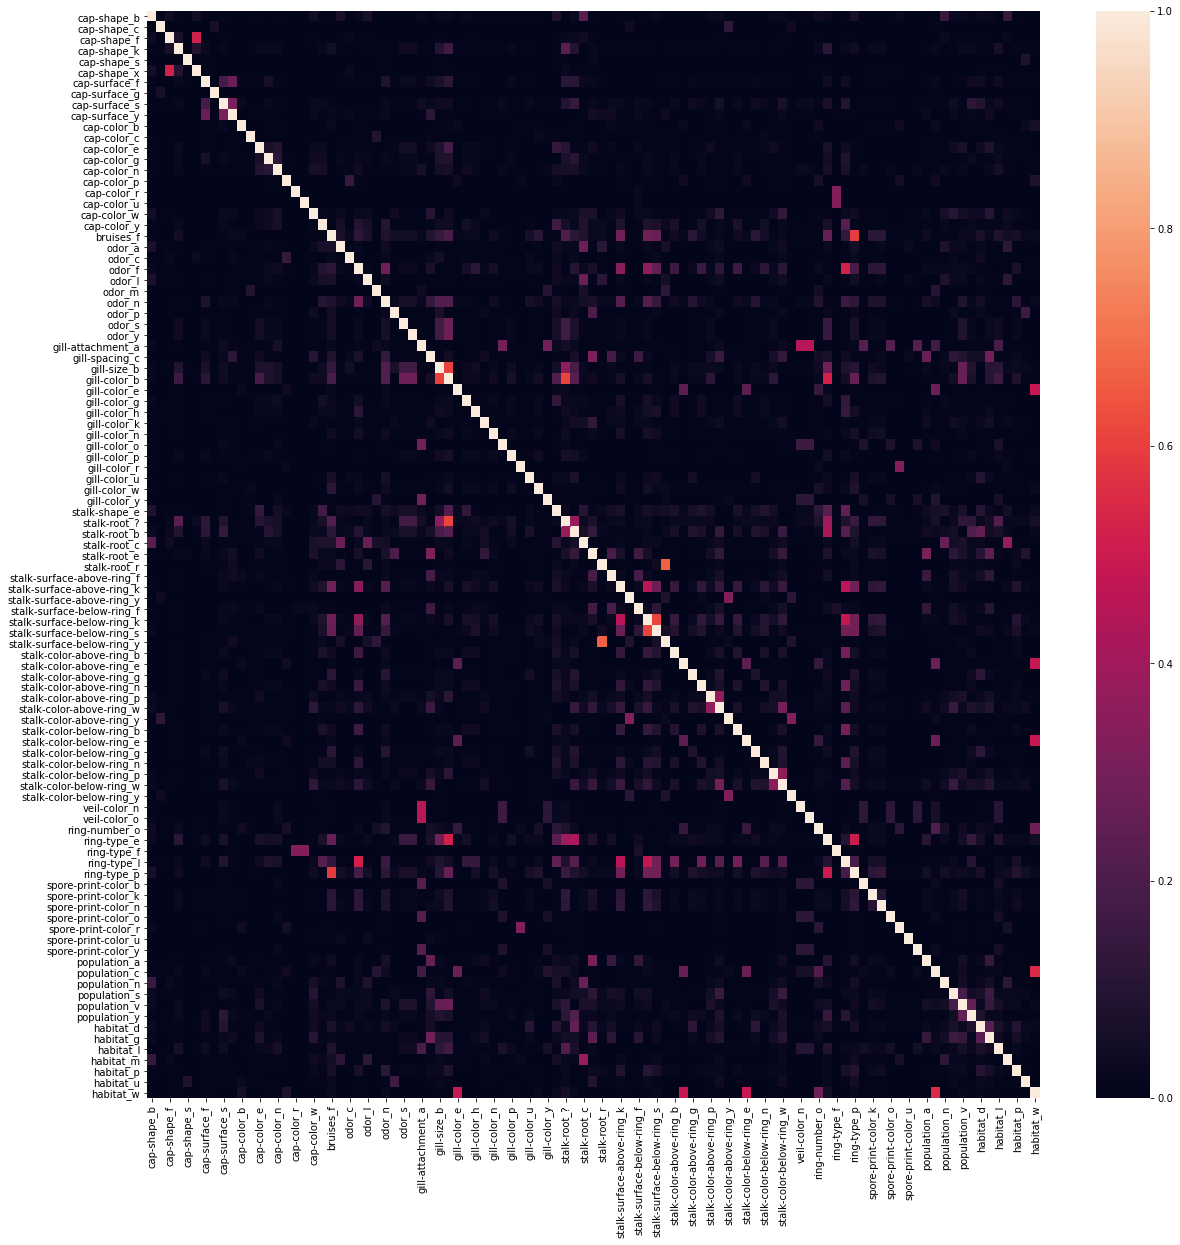

In [62]:
x_corr = X.corr()**2

print("All feature labels may not be visible on the plot")
fig = plt.figure(figsize=(20,20))
sns.heatmap(x_corr.round(2)) #, annot=True)
plt.show()

#### Split data

In [63]:
X = np.array(X)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(X, y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(6093, 99) (2031, 99) (6093,) (2031,)


In [65]:
6093+2031

8124

In [66]:
dfmain.shape

(8124, 23)

### Model

In [67]:
def fit_predict(clf):
    print('#'*25)
    print(clf)
    
    # Train
    clf.fit(x_train, y_train)
    
    # Predict
    y_pred = clf.predict(x_test)
    
    # Accuracy
    acu = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy: ", acu)
    
    # Confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    print("Confusion matrix:\n", cm)
    
    return acu, cm

In [68]:
results = []

for clf, name in (
                (linear_model.LogisticRegression(penalty='l2', tol=1e-2, solver='liblinear'), 'Logistic Regression Classifier'),
                (linear_model.RidgeClassifier(alpha=0.5, tol=1e-2, solver='auto'), 'Ridge Classifier'),
                (linear_model.Perceptron(penalty='elasticnet', max_iter=50), 'Perceptron'),
                (linear_model.PassiveAggressiveClassifier(tol=1e-2, max_iter=50), 'Passive Aggresive Classifier'),
                (LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.5), 'LDA'),
                (QuadraticDiscriminantAnalysis(reg_param=0.5), 'QDA')
                ):
    
    print('#'*25, '\n')
    print(name)
    results.append((fit_predict(clf), name))
    
for penalty in ['l2', 'l1', 'elasticnet']:
    print('#'*25)
    print('SGD Classifier: %s penalty' % penalty.upper())
    
    results.append((fit_predict(linear_model.SGDClassifier(alpha=1e-2, max_iter=50, penalty=penalty)), 'SGD Classifier'))

######################### 

Logistic Regression Classifier
#########################
LogisticRegression(solver='liblinear', tol=0.01)
Accuracy:  1.0
Confusion matrix:
 [[1063    0]
 [   0  968]]
######################### 

Ridge Classifier
#########################
RidgeClassifier(alpha=0.5, tol=0.01)
Accuracy:  1.0
Confusion matrix:
 [[1063    0]
 [   0  968]]
######################### 

Perceptron
#########################
Perceptron(max_iter=50, penalty='elasticnet')
Accuracy:  1.0
Confusion matrix:
 [[1063    0]
 [   0  968]]
######################### 

Passive Aggresive Classifier
#########################
PassiveAggressiveClassifier(max_iter=50, tol=0.01)
Accuracy:  1.0
Confusion matrix:
 [[1063    0]
 [   0  968]]
######################### 

LDA
#########################
LinearDiscriminantAnalysis(shrinkage=0.5, solver='lsqr')
Accuracy:  0.9807976366322009
Confusion matrix:
 [[1055    8]
 [  31  937]]
######################### 

QDA
#########################
QuadraticDiscriminan

/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [69]:
results

[((1.0,
   array([[1063,    0],
          [   0,  968]])),
  'Logistic Regression Classifier'),
 ((1.0,
   array([[1063,    0],
          [   0,  968]])),
  'Ridge Classifier'),
 ((1.0,
   array([[1063,    0],
          [   0,  968]])),
  'Perceptron'),
 ((1.0,
   array([[1063,    0],
          [   0,  968]])),
  'Passive Aggresive Classifier'),
 ((0.9807976366322009,
   array([[1055,    8],
          [  31,  937]])),
  'LDA'),
 ((0.9803052683407188,
   array([[1059,    4],
          [  36,  932]])),
  'QDA'),
 ((0.9955686853766618,
   array([[1063,    0],
          [   9,  959]])),
  'SGD Classifier'),
 ((0.9931068439192516,
   array([[1063,    0],
          [  14,  954]])),
  'SGD Classifier'),
 ((0.9931068439192516,
   array([[1063,    0],
          [  14,  954]])),
  'SGD Classifier')]

# Congratulations on completing the machine learning project!

## Hope you enjoyed the data analysis. Thank you !!!

### Please like, share and subscribe to learndataa

https://www.youtube.com/c/learndataa

In [119]:
#learndataa learndataa learndataa learndataa learndataa learndataa learndataa learndataa learndataa